In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from imblearn.over_sampling import ADASYN,  KMeansSMOTE

# Dataset from [Here](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [35]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [36]:
data=pd.read_csv("creditcard.csv", sep=",")

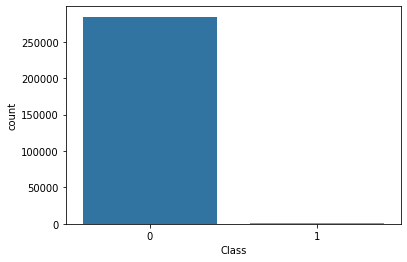

In [37]:
sns.countplot(data["Class"]);

In [38]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [40]:
# y=data["Class"]
# data=data.drop(["Class"], axis=1)

In [41]:
#X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

y_train = train["Class"]
X_train = train.drop(["Class"], axis=1)

y_test = test["Class"]
X_test = test.drop(["Class"], axis=1)

In [43]:
ada = ADASYN(random_state=0)
X_train, y_train = ada.fit_resample(X_train, y_train)

In [44]:
NB_EPOCH = 10
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [45]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)

In [46]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
model.fit(X_train_d, y_train, 
              validation_split=VALIDATION_SPLIT,
              batch_size=BATCH_SIZE, 
              epochs=NB_EPOCH)

Train on 363944 samples, validate on 90986 samples
Epoch 1/10
363944/363944 [==============================] - 259s 712us/step - loss: 0.0548 - accuracy: 0.9840 - val_loss: 0.4248 - val_accuracy: 0.9683
Epoch 2/10
363944/363944 [==============================] - 253s 694us/step - loss: 0.0241 - accuracy: 0.9937 - val_loss: 0.1747 - val_accuracy: 0.9725
Epoch 3/10
363944/363944 [==============================] - 259s 710us/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.1939 - val_accuracy: 0.9683
Epoch 4/10
363944/363944 [==============================] - 261s 718us/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.1552 - val_accuracy: 0.9700
Epoch 5/10
363944/363944 [==============================] - 253s 696us/step - loss: 0.0129 - accuracy: 0.9968 - val_loss: 0.0995 - val_accuracy: 0.9730
Epoch 6/10
363944/363944 [==============================] - 254s 698us/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.1312 - val_accuracy: 0.9697
Epoch 7/10
363944/363944 [===========

In [ ]:
y_pred=model.predict(X_test_d)

In [ ]:
y_pred=np.round(y_pred)

In [ ]:
LABELS = ["Normal", "Fraud"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print("Accuracy:", np.round(metrics.accuracy_score(y_test, y_pred),4))
print("f1-мера:", np.round(metrics.f1_score(y_test, y_pred),4))
print("roc_auc_score:", np.round(metrics.roc_auc_score(y_test, y_pred),4))